In [1]:
import requests
from __future__ import print_function    # (at top of module)
import json
import time
import sys
import pandas as pd
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials



In [2]:


scope = 'user-library-read'

if len(sys.argv) > 1:
    #username = sys.argv[1]
    username = 'tomsyouruncle'
else:
    print "Usage: %s username" % (sys.argv[0],)
    sys.exit()

token = util.prompt_for_user_token(username, scope)

if token:
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_saved_tracks()
    for item in results['items']:
        track = item['track']
        print track['name'] + ' - ' + track['artists'][0]['name']
else:
    print "Can't get token for", username



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opening https://accounts.spotify.com/authorize?scope=user-library-read&redirect_uri=https%3A%2F%2Finfinite-retreat-20488.herokuapp.com&response_type=code&client_id=ccad60ae1514430482855e1e4a2cc1e8 in your browser


Enter the URL you were redirected to: https://infinite-retreat-20488.herokuapp.com/?code=AQD087yVPbSe4iSLwOJXOaTWPNYS2pjM7hxeTXSj6vQ6N2fnDP-bNNT5B9aKYtQ-VK55xVtGoiOmUJolWV5vUxEq0K7_T46M9-nHog_9ncnxKVMg2W-11BKcndyRAT-cbHwE76wIK6mIM3D7CPeU-WwZgWrXLUUb0zVfz2Yp9LNY8X8EcztVlbbHzq2j1_cen3DST5ZMGv2dgs7AKmhYiGuzeDnUGurSi9IQkHKjscH0CXePsQ


Dreams - Beck
Winter - Daughter
Smother - Daughter
Youth - Daughter
Still - Daughter
Lifeforms - Daughter
Tomorrow - Daughter
Human - Daughter
Touch - Daughte

In [42]:
import sys
import os
import spotipy
import spotipy.util as util

def get_tracks_from_playlist_OLD(username,playlist_id):  
    output_ids = [] 
    token = util.prompt_for_user_token(username)
    if token:
        top = 40
        sp = spotipy.Spotify(auth=token)
        playlists = sp.user_playlists(username)
        for playlist in playlists['items']:
            if (playlist['owner']['id'] == username) & (playlist['id'] == playlist_id):
                results = sp.user_playlist(username, playlist['id'], fields="tracks,next")
                tracks = results['tracks']
                for i, item in enumerate(tracks['items']):
                    track = item['track']
                    output_ids.append(str(track['id']))
        return output_ids
    else:
        print("Can't get token for", username)

def get_tracks_from_playlist(username,p_id):  
    output_ids = [] 
    token = util.prompt_for_user_token(username)
    if token:
        sp = spotipy.Spotify(auth=token)
        results = sp.user_playlist(username, p_id, fields="tracks,next")
        tracks = results['tracks']
        for i, item in enumerate(tracks['items']):
            track = item['track']
            output_ids.append(str(track['id']))
        return output_ids
    else:
        print("Can't get token for", username)



def features_list(track_ids_array):
    client_credentials_manager = SpotifyClientCredentials()
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    sp.trace = False
    features = sp.audio_features(track_ids_array)
    return pd.read_json(json.dumps(features, indent=4))


['7nFIyA6oVMB1aWWMtwmwCb', '06fHCTW9L6bnwbDCkG5Hq2', '3haxKYThPw9twlYWxmIP5X', '3OmlKzFE3tx95xQqon0yVJ', '0t3J66UKbK7whjKNimDkSt', '5ILFBWKGVySOJGFaqIOjkq', '4x5ltw9gjrT9E5pT9wEoom', '0Do3CVPm5VaCbknjTnErw4', '4YXrotEiEDQtmVdugutstF', '5bfHKqDkxyuNTLS3cyI1yJ', '0rH1NTrKrLnP3uKoFQJm3L', '4ZWoFBwQyR3Ee9rkqNYt6X', '3OusPKOCENzxpRBPXCTTKb', '4xoq3HnSi1mdKGxmI4Xbxw', '6L5X383KFSUMJDenXg4khV', '5J0Ur1bkRzIpWszSV5PEwt', '7bG5eXM22U7Nr02NJeTaGq', '45lx5763yM34WIYEsoxo9y', '5mvYtI40RlMnREBi8o6zno', '5Wb6JGdeQIVP1L0f97KWoh', '66PMAB5zDvT2kQ5ryTcyiE', '7b0qKdv8k5wD50kAFTIq1i', '1DSiXAr00irAHh0t0BXxqT', '10Sw5hqXwntYPwAT3sSvDg', '6d2WzCOnjEVp8eyguUmefZ', '4pRWivSv0T4lEz1VKXUmg6', '77QVnO0duRTyA040yqssys', '5NvuzRYvxRuDGU9NyDhDqw', '0UihiAeQZfP2gPzAIaIBqJ', '3fs6yOsb1KT7i8w9jSEBpZ', '2naTfNQjSu9qumZQ4I2u55', '2OU8eqr7ifo1PpvYKxJ939', '588eyYPoqN30v2jcqndKG0']


In [43]:
#track_list = get_tracks_from_playlist('pyramus','0pO9SXtmcARHLPUkp6WnzJ')
track_list = get_tracks_from_playlist('spotify_uk_','2Ejbdf2DC9JGr5qdT0Z852')
track_list
#track_features = features_list(track_list)
#track_features.describe()

['2Dts49OexROL2KvCK2sokf',
 '06jUyksEtBcrcXoYMOli1M',
 '3u9fHuAtjMY1RW2mZfO4Cf',
 '6wninWNdit2Bc0lz8kTGEk',
 '0Zh5U48tZNeAzzLTV1CVBE',
 '3xX9hoGEq1EuMGWZl8LQL1',
 '20LxTsa6936zOlzTWqoPVt',
 '29UzHkRHqGrqSikUDRWIam',
 '1siDRjAa8MdxNoCHTiiQ7B',
 '5q6pg1kvXfT7z5MqG0KKSs',
 '4m1B88bynbZIVnrDsUINYc',
 '6Tsu3OsuMz4KEGKbOYd6A0',
 '0I3q5fE6wg7LIfHGngUTnV',
 '70FCugJxa7XW04Np6iYJdI',
 '6e8Ou0wiqAzIpWb2eSxll8',
 '4OjblmIUlyF25C8z48OBnD',
 '0svl7cK07gK1ia5ainczU5',
 '68pWLkspLFIfIPPtzyTkQy',
 '6EElYDYyvvohMNDbYnrvn4',
 '4LujRMTMwAfFKjm45tixHY',
 '1oTHteQbmJw15rPxPVXUTv',
 '2tOZtdbkAMQASWokLvSlzj',
 '3ssX20QT5c3nA9wk78V1LQ',
 '09WxJCWFMWAxTHBLLelpDS',
 '4RY96Asd9IefaL3X4LOLZ8',
 '32SFvZODywPBVDYSYtqxCj',
 '0ncPdmNqiMvKK1J36Dgr6f',
 '33ZXjLCpiINn8eQIDYEPTD',
 '3kG2YgxjYnnPBlo7H08Xt3',
 '3jagJCUbdqhDSPuxP8cAqF',
 '2oTDOIAdsxPTE7yAp4YOcv',
 '7mY0VLDJs3KU0aUTGGCseI',
 '0WKYRFtH6KKbaNWjsxqm70',
 '63BcfK6YAzJYeISaTPr6IO',
 '6YYd5MLpu45J0uLrMdivF7',
 '2tNmhDlMbwQZLxQtWMt2EU',
 '4r3MJuJIArZTQfOinh1HFa',
 

In [9]:
track_features.columns.values

array([u'acousticness', u'analysis_url', u'danceability', u'duration_ms',
       u'energy', u'id', u'instrumentalness', u'key', u'liveness',
       u'loudness', u'mode', u'speechiness', u'tempo', u'time_signature',
       u'track_href', u'type', u'uri', u'valence'], dtype=object)

In [68]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

In [49]:
playlists = pd.read_csv('spotify_playlists.csv')

In [50]:
playlists

,playlist_id,playlist_name,user_id
0,2Ejbdf2DC9JGr5qdT0Z852,Old School Hip Hop House Party,spotify_uk_
1,7wUUwoxU2S6BRKA2bDPYKD,Massive dance hits,spotify_uk_
2,2aUKPl1SatBDloOMrR1hAp,Indie Roadtrip,spotify_uk_
3,5O2ERf8kAYARVVdfCKZ9G7,Coffee Table Jazz,spotify
4,6CRNGyV2hoQDyYpUPjHrkz,Top Classical,spotify


In [64]:
data_array = []
for i in xrange(5):
    print(i)
    table = features_list(get_tracks_from_playlist(playlists.ix[i,2],playlists.ix[i,0]))
    table['playlist_id'] = playlists.ix[i,0]
    table['playlist_name'] = playlists.ix[i,1]
    data_array.append(table)
master_dataset = pd.concat(data_array)

0
1
2
3
4


In [74]:
master_dataset.columns

Index([    u'acousticness',     u'analysis_url',     u'danceability',
            u'duration_ms',           u'energy',               u'id',
       u'instrumentalness',              u'key',         u'liveness',
               u'loudness',             u'mode',      u'speechiness',
                  u'tempo',   u'time_signature',       u'track_href',
                   u'type',              u'uri',          u'valence',
            u'playlist_id',    u'playlist_name'],
      dtype='object')

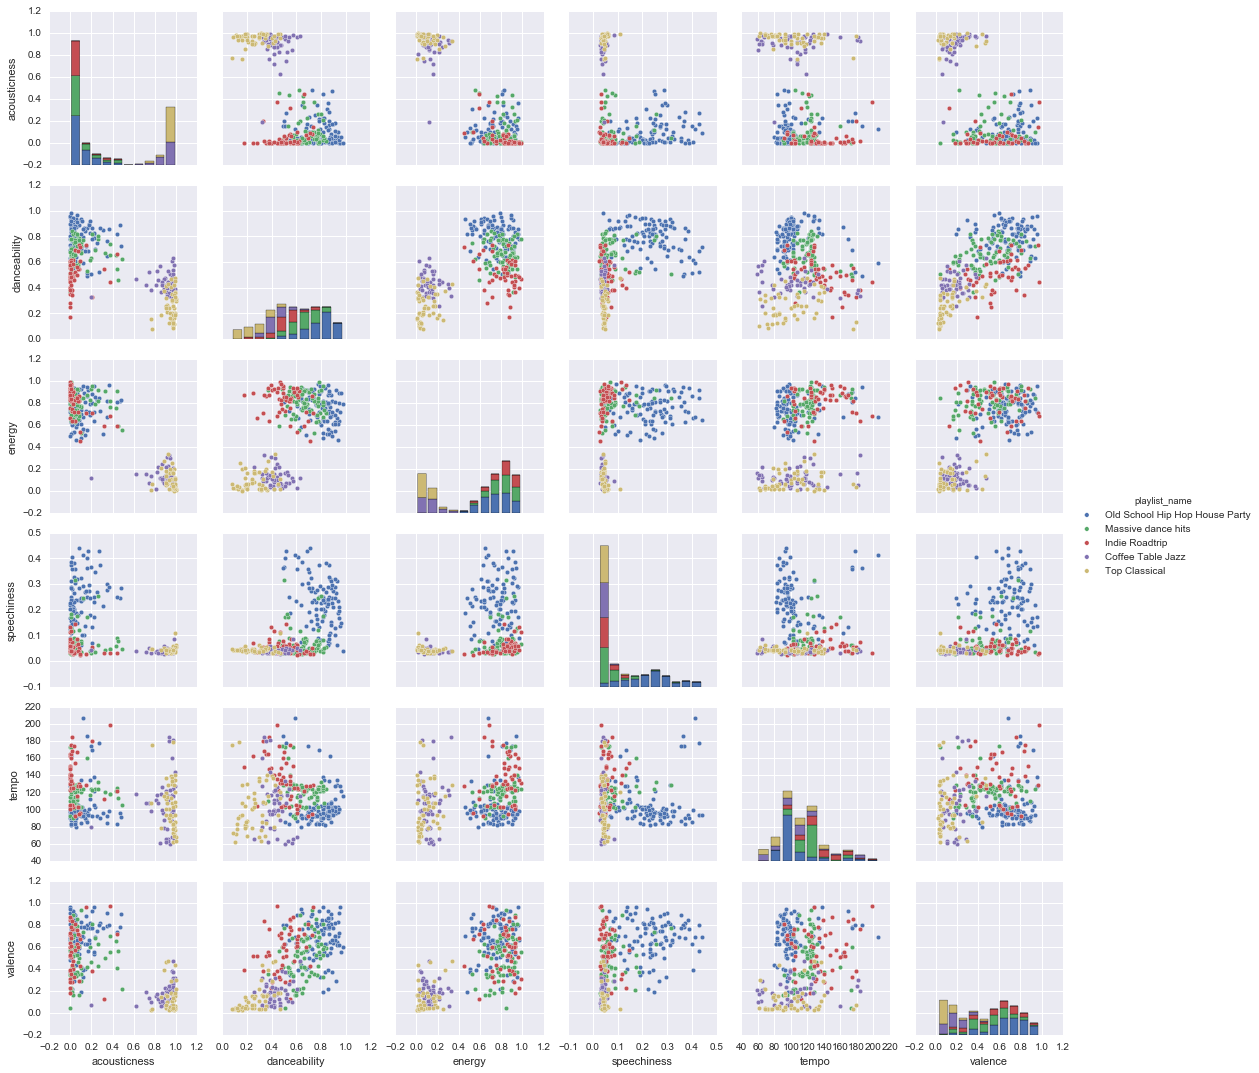

In [79]:
feature_subset = master_dataset[['playlist_name','acousticness','danceability','energy','speechiness','tempo','valence']]

sb.pairplot(feature_subset.dropna(), hue='playlist_name')